In [1]:
import pyrenn
from matplotlib import pyplot as plt
import math
import numpy as np
import neurolab as nl
import seaborn as sns
import random
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D

#### Задание 1

Использовать автоассоциативную сеть с узким горлом для отображения набора данных,выделяя первую главную компоненту данных.

В соответствии с вариантом задания сгенерируем обучающее множество. 

Эллипс: a = 0.7, b = 0.2, $\alpha$ = −$\pi$/6, $x_0$ = 0, $y_0$ = −0.1

In [4]:
def f(t):
    return 0.7 * np.cos(t - np.pi / 6)

def g(t):
    return 0.2 * np.sin(t) - 0.1

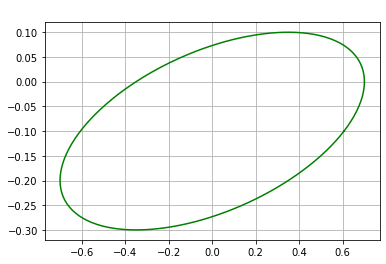

In [5]:
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / 0.025), endpoint=True) 

x = f(t)
y = g(t)

plt.plot(x, y, 'green')
plt.grid(True)
plt.title('input data', c='white')
plt.show()

Создать линейную многослойную сеть прямого распространения

Число нейронов  скрытого слоя задать равным 1.

Используем метод Левенберга-Марквардта в качестве алгоритма обучения.

Параметры обучения: число эпох обучения 100, предельное значение критерия обучения $10^{−5}$.

In [7]:
nn = pyrenn.train_LM(P, T, nn, E_stop=1e-5, k_max=100)

Maximum number of iterations reached


Рассчитать выход сети для обучающего множества

In [8]:
output = pyrenn.NNOut(x, nn)

Метод главных компонент — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. 

Используем метод главных компонент, выделяя первую главную компоненту данных.

In [9]:
pca = PCA(n_components=1)
data = np.array([[i, j] for i, j in zip(x, y)])
#Fit the model with X and apply the dimensionality reduction on X.
data = pca.fit_transform(data)
#Transform data back to its original space.
data = pca.inverse_transform(data)

С помощью сети восстановили набор данных, учитывая информацию только о первой главной компоненте.

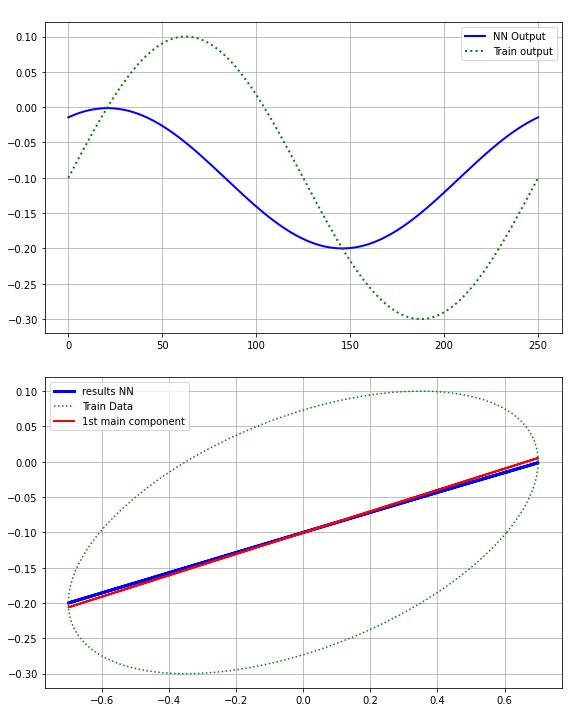

In [10]:
fig = plt.figure(figsize=(8,10))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

ax0.set_title('Output', c='white')
ax0.plot(output, color='b', lw=2, label='NN Output')
ax0.plot(y, color='g', linestyle=':', lw=2, label='Train output')
ax0.legend()
ax0.grid()

ax1.set_title('Train data', c='white')
ax1.plot(x, output, color='b', lw=3, label='results NN')
ax1.plot(x, y, color='g', linestyle=':', label='Train Data')
ax1.plot(data[:, 0], data[:, 1], color='r', lw=2, label='1st main component')
ax1.legend()
ax1.grid()

fig.tight_layout()
plt.show()

#### Задание 2

Использовать автоассоциативную сеть с узким горлом для аппроксимации кривой на плоскости, выделяя первую нелинейную главную компоненту данных.

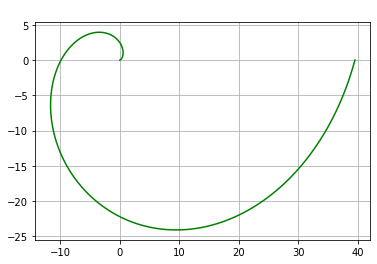

In [11]:
phi = np.linspace(0, 2 * np.pi, int(2 * np.pi / 0.025), endpoint=True) 
r = phi * phi
x2 = r * np.cos(phi)
y2 = r * np.sin(phi)

plt.plot(x2, y2, 'green')
plt.grid(True)
plt.title('Input data', c='white')
plt.show()

Число нейронов скрытого слоя задать равным [10,1,10]. Используем метод Левенберга-Марквардта в качестве алгоритма обучения.

In [12]:
nn2 = pyrenn.CreateNN([1, 10, 1, 10, 1])

In [13]:
nn2 = pyrenn.train_LM(x2, y2, nn2, verbose=True, E_stop=1e-5, k_max=2000)
output2 = pyrenn.NNOut(x2, nn2)

Iteration:  0 		Error:  43.26779073167793 	scale factor:  3.0
Iteration:  1 		Error:  39.75754379731172 	scale factor:  0.3
Iteration:  2 		Error:  38.725378662776905 	scale factor:  0.3
Iteration:  3 		Error:  36.499434288241936 	scale factor:  0.3
Iteration:  4 		Error:  36.32407991292883 	scale factor:  0.3
Iteration:  5 		Error:  35.908210217067726 	scale factor:  0.3
Iteration:  6 		Error:  34.944409567186135 	scale factor:  0.3
Iteration:  7 		Error:  33.30985525896437 	scale factor:  0.3
Iteration:  8 		Error:  31.132041874878247 	scale factor:  0.3
Iteration:  9 		Error:  28.527495832691812 	scale factor:  0.3
Iteration:  10 		Error:  25.75313068135416 	scale factor:  0.3
Iteration:  11 		Error:  24.414306187894052 	scale factor:  0.3
Iteration:  12 		Error:  23.619164258320954 	scale factor:  0.3
Iteration:  13 		Error:  23.025971229073033 	scale factor:  0.3
Iteration:  14 		Error:  22.41107381551994 	scale factor:  0.03
Iteration:  15 		Error:  21.727971924812454 	scale fact

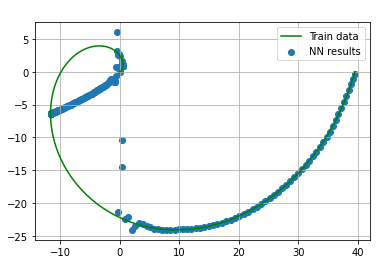

In [14]:
plt.plot(x2, y2, 'green', label='Train data')
plt.scatter(x2, output2, label='NN results')
plt.grid(True)
plt.title('Results', c='white')
plt.legend()
plt.show()

#### Задание 3

Применить автоассоциативную сеть с узким горлом для аппроксимации пространственной кривой, выделяя старшие нелинейные главные компоненты данных. 

Задан обучающий набор, точки набора лежат на пространственной кривой. 

Модифицировать обучающее множество из задания 2, добавив в каждой точке третью координату по формуле z = $\phi$

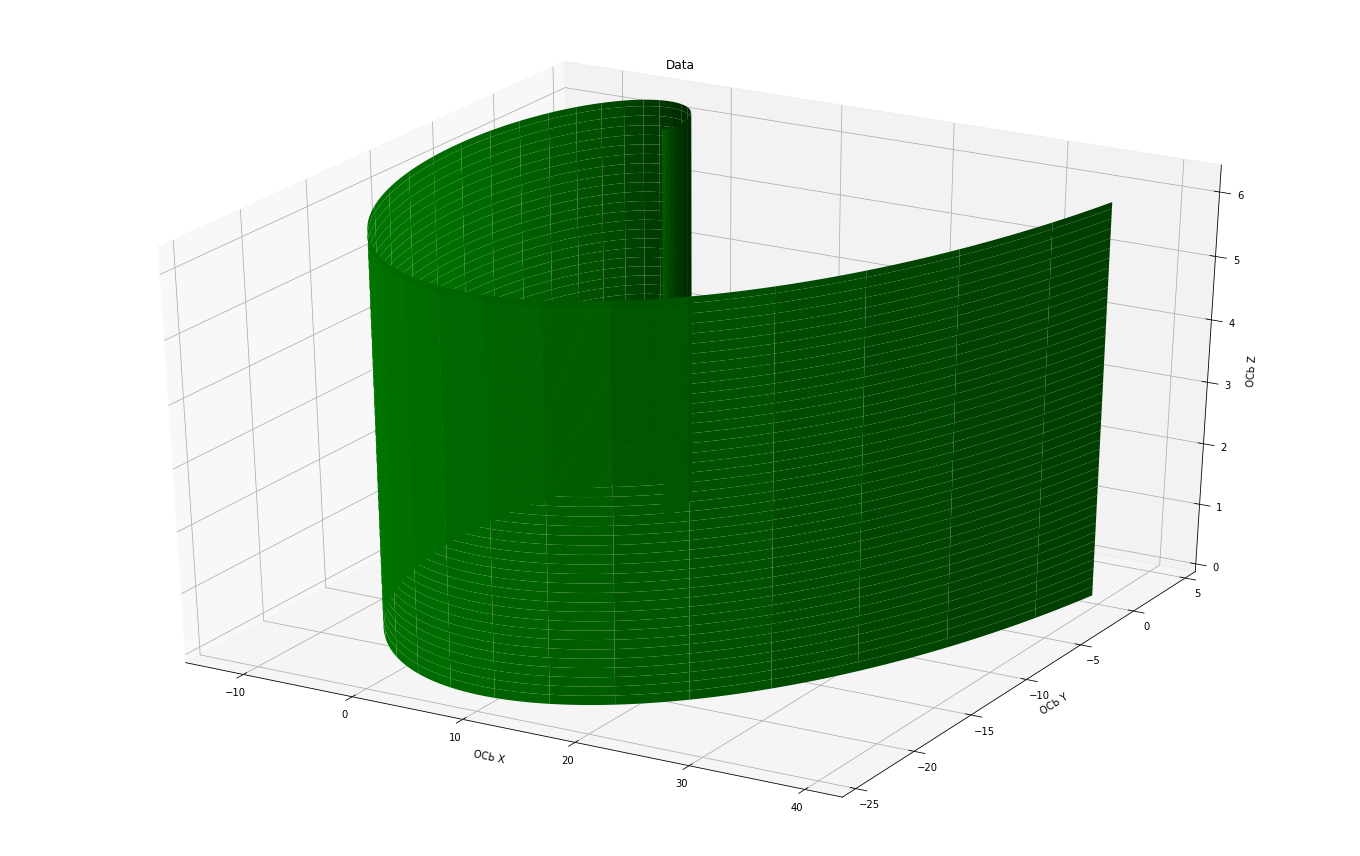

In [15]:
phi = np.linspace(0, 2 * np.pi, int(2 * np.pi / 0.025), endpoint=True) 
r = phi * phi
x3 = r * np.cos(phi)
y3 = r * np.sin(phi)
z = phi


fig = plt.figure(num=1, figsize=(19, 12), clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x3, y3, z.reshape(-1, 1), color='green')
ax.set_title('Data')
ax.set_xlabel('ОСЬ X')
ax.set_ylabel('ОСЬ Y')
ax.set_zlabel('ОСЬ Z')
fig.tight_layout()

Построим автоассоциативную сеть с узким горлом, реализующую нелинейный метод главных компонент.

Число  нейронов  скрытого  слоя равно [10,2,10]. Задаем метод Левенберга-Марквардта в качестве алгоритма обучения.

In [16]:
nn3 = pyrenn.CreateNN([2, 10, 2,  10, 1])
nn3 = pyrenn.train_LM(np.array([x3, z]), y3, nn3, E_stop=1e-5, k_max=500)
# Рассчитать выход сети для обучающего множества.
output3 = pyrenn.NNOut(np.array([x3, z]), nn3)

Termination Error reached


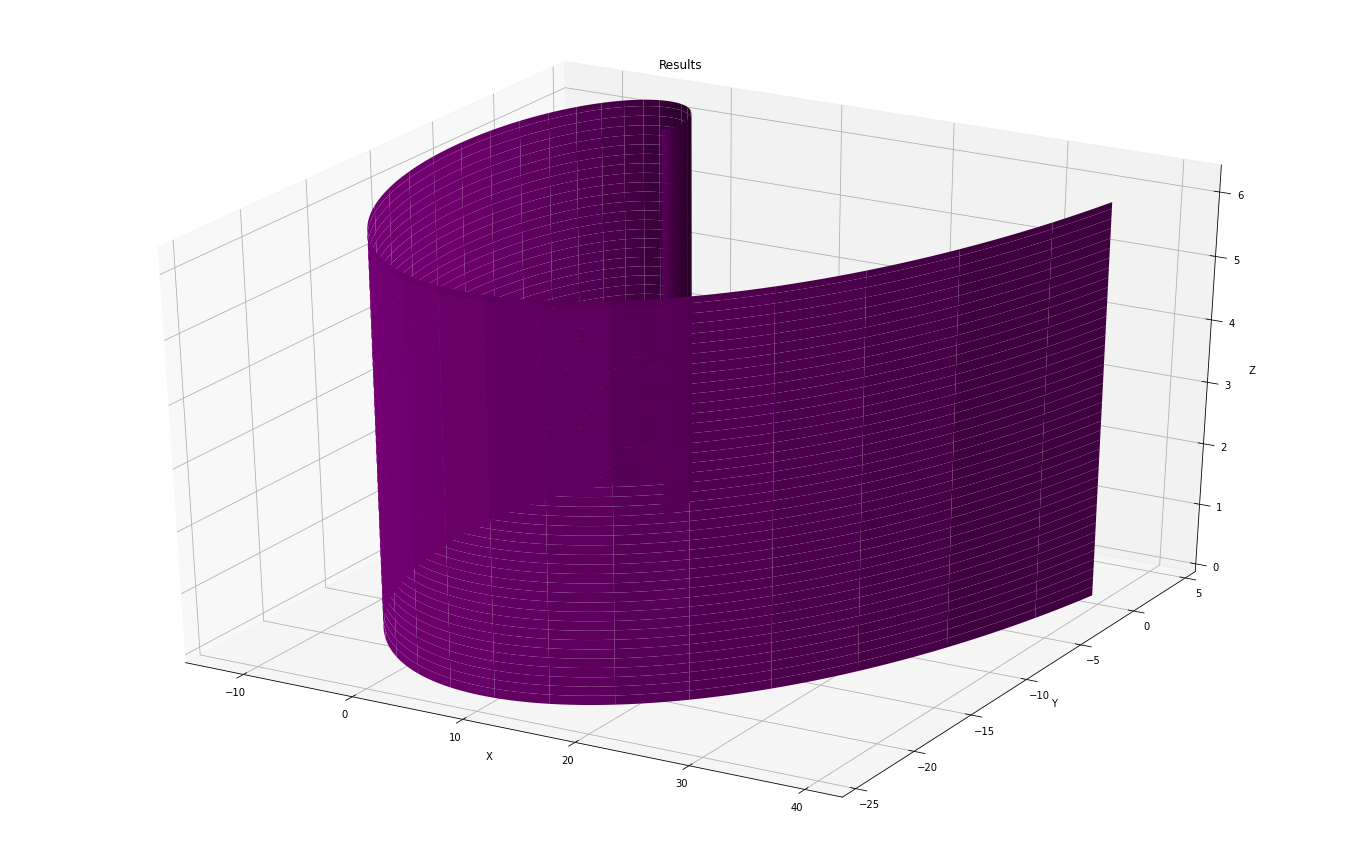

In [17]:
fig = plt.figure(num=1, figsize=(19, 12), clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x3, output3, z.reshape(-1, 1), color='purple', label='Output NN')
ax.set_title('Results')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.tight_layout()